In [275]:
from __future__ import print_function 

import pandas as pd 
import matplotlib as plt 
import os 

data_path = ['C:/Users/japor/Desktop/Machine Learning 501 Nervana/Intel-ML101_Class1/data']

In [277]:
filepath = os.sep.join(data_path + ['Iris_Data.csv'])
print (filepath)

data = pd.read_csv(filepath)
data.head()

C:/Users/japor/Desktop/Machine Learning 501 Nervana/Intel-ML101_Class1/data\Iris_Data.csv


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [42]:
data.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


### Question 1 

In [110]:
# Q1a - Number of rows 
print (data.shape[0])

# Q1b - Column Names 
print (data.columns.tolist())

# Q1c - Datatypes 
print (data.dtypes)

150
['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object


### Question 2

In [ ]:
# Q2a - Remove 'Iris-' from species name 
data['species'] = data.species.str.replace('Iris-','')
# data['abbrev'] = data.species.apply(lambda x: x.replace('Iris-',''))

data.head()

### Question 3 

In [ ]:
# Q3a - Number of each species present 
data.species.value_counts()

In [112]:
# Q3b - mean, median, and quantiles and ranges
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [163]:
# mean 
avg = data.describe().loc['mean']
pd.DataFrame(avg)


,mean
sepal_length,5.843333
sepal_width,3.054000
petal_length,3.758667
petal_width,1.198667


In [162]:
# median 
med = data.describe().loc['50%']
pd.DataFrame(med)


,50%
sepal_length,5.80
sepal_width,3.00
petal_length,4.35
petal_width,1.30


In [161]:
# quantiles
joined_data = list(zip(data.describe().loc['min'], 
                       data.describe().loc['25%'], 
                       data.describe().loc['75%'], 
                       data.describe().loc['max']))
xnames = data.describe().columns.tolist()
quantile = pd.DataFrame(joined_data, index = xnames, columns = ['0%', '25%', '75%', '100%'])
quantile


,0%,25%,75%,100%
sepal_length,4.3,5.1,6.4,7.9
sepal_width,2.0,2.8,3.3,4.4
petal_length,1.0,1.6,5.1,6.9
petal_width,0.1,0.3,1.8,2.5


In [168]:
# range 
range = data.describe().loc['max'] - data.describe().loc['min']
pd.DataFrame(range, columns = ['Range'])

,Range
sepal_length,3.6
sepal_width,2.4
petal_length,5.9
petal_width,2.4


### Question 4 

In [172]:
# Q4a - mean of each measurement for each species 
data.groupby('species').mean()


,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.418,1.464,0.244
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [173]:
# Q4b - median of each measurement for each species 
data.groupby('species').median()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.0,3.4,1.50,0.2
versicolor,5.9,2.8,4.35,1.3
virginica,6.5,3.0,5.55,2.0


In [180]:
# Q4 - combine 
import numpy as np
species = data.groupby('species')
# species.agg(['mean','median']) # passing a list of recognized strings
species.agg([np.mean,np.median]) # passing a list of explicit aggregation fxns


sepal_length        sepal_width        petal_length         \
                   mean median        mean median         mean median   
species                                                                 
setosa            5.006    5.0       3.418    3.4        1.464   1.50   
versicolor        5.936    5.9       2.770    2.8        4.260   4.35   
virginica         6.588    6.5       2.974    3.0        5.552   5.55   

           petal_width         
                  mean median  
species                        
setosa           0.244    0.2  
versicolor       1.326    1.3  
virginica        2.026    2.0

In [186]:
# DON'T UNDERSTAND THIS PART 
from pprint import pprint

agg_dict = {field: ['mean', 'median'] for field in data.columns if field != 'species'}
agg_dict['petal_length'] = 'max'
pprint(agg_dict)
data.groupby('species').agg(agg_dict)

{'petal_length': 'max',
 'petal_width': ['mean', 'median'],
 'sepal_length': ['mean', 'median'],
 'sepal_width': ['mean', 'median']}


sepal_length        sepal_width        petal_length petal_width  \
                   mean median        mean median          max        mean   
species                                                                      
setosa            5.006    5.0       3.418    3.4          1.9       0.244   
versicolor        5.936    5.9       2.770    2.8          5.1       1.326   
virginica         6.588    6.5       2.974    3.0          6.9       2.026   

                   
           median  
species            
setosa        0.2  
versicolor    1.3  
virginica     2.0

### Question 5 

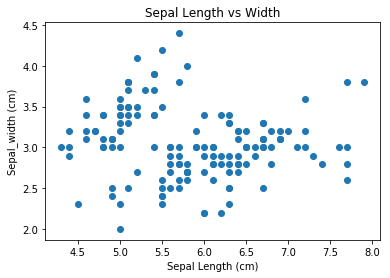

In [194]:
# Q5 - Scatterplot of sepal_length vs sepal_width with axes label and title 
import matplotlib.pyplot as plt 
%matplotlib inline

ax = plt.axes();
ax.scatter(data.sepal_length, data.sepal_width);

# label axes and title 
ax.set(xlabel = 'Sepal Length (cm)', 
       ylabel = 'Sepal_width (cm)', 
       title = 'Sepal Length vs Width');

### Question 6 

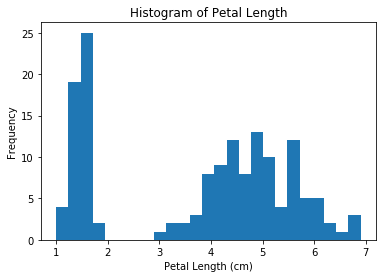

In [202]:
# Q6 - Histogram of a feature with axes label and title 
ax2 = plt.axes(); 
ax2.hist(data.petal_length, bins=25);

# label axes and title 
ax2.set(xlabel = 'Petal Length (cm)', 
        ylabel = 'Frequency', 
        title = 'Histogram of Petal Length');


### Question 7

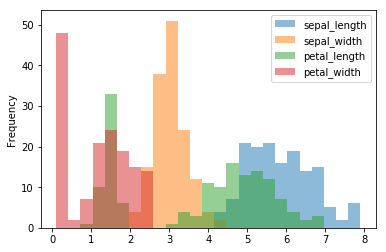

In [210]:
# Q7 - Single plot with overlaid histograms 
ax3 = data.plot.hist(bins = 25, alpha = 0.5) # alpha is opacity 


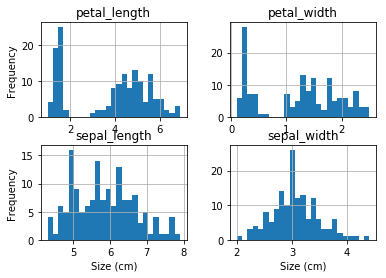

In [220]:
# Q7 - 4 separate plots on one figure 
axList = data.hist(bins = 25) 

# Add x- and y-labels to first column and last row 
for ax in axList.flatten(): 
    if ax.is_last_row(): 
        ax.set_xlabel('Size (cm)')
    if ax.is_first_col(): 
        ax.set_ylabel('Frequency')

        

### Question 8 

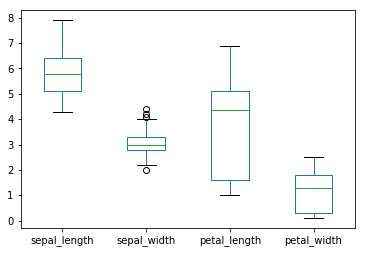

In [226]:
# Q8 - Boxplot of petal and sepal measurements 
boxplots = data.plot.box()

### Question 9 

In [234]:
# Q9 - Boxplot where features are separated in x-axis 
# and species are colored with different hues 
plot_data = (data)
plot_data.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [252]:
# Reshape data so there is only one measurement in each column 
plot_data = (data
             .set_index('species')
             .stack()
             .to_frame()
             .reset_index()
             .rename(columns = {0: 'size', 'level_1': 'measurement'})
            )
plot_data.head()


,species,measurement,size
0,setosa,sepal_length,5.1
1,setosa,sepal_width,3.5
2,setosa,petal_length,1.4
3,setosa,petal_width,0.2
4,setosa,sepal_length,4.9


In [251]:
plot_data.tail()

,species,measurement,size
595,virginica,petal_width,2.3
596,virginica,sepal_length,5.9
597,virginica,sepal_width,3.0
598,virginica,petal_length,5.1
599,virginica,petal_width,1.8


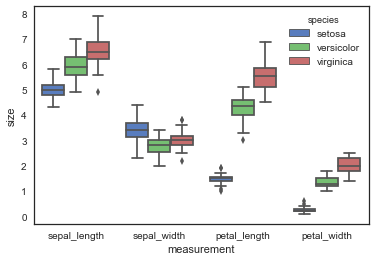

In [265]:
# Plot dataframe using Seaborn 
import seaborn as sns
sns.set_context('notebook')
sns.set_style('white')
sns.set_palette('muted')

f = plt.figure(figsize = (6,4))
sns.boxplot(x = 'measurement', y = 'size', hue = 'species', data = plot_data); 

### Question 10 

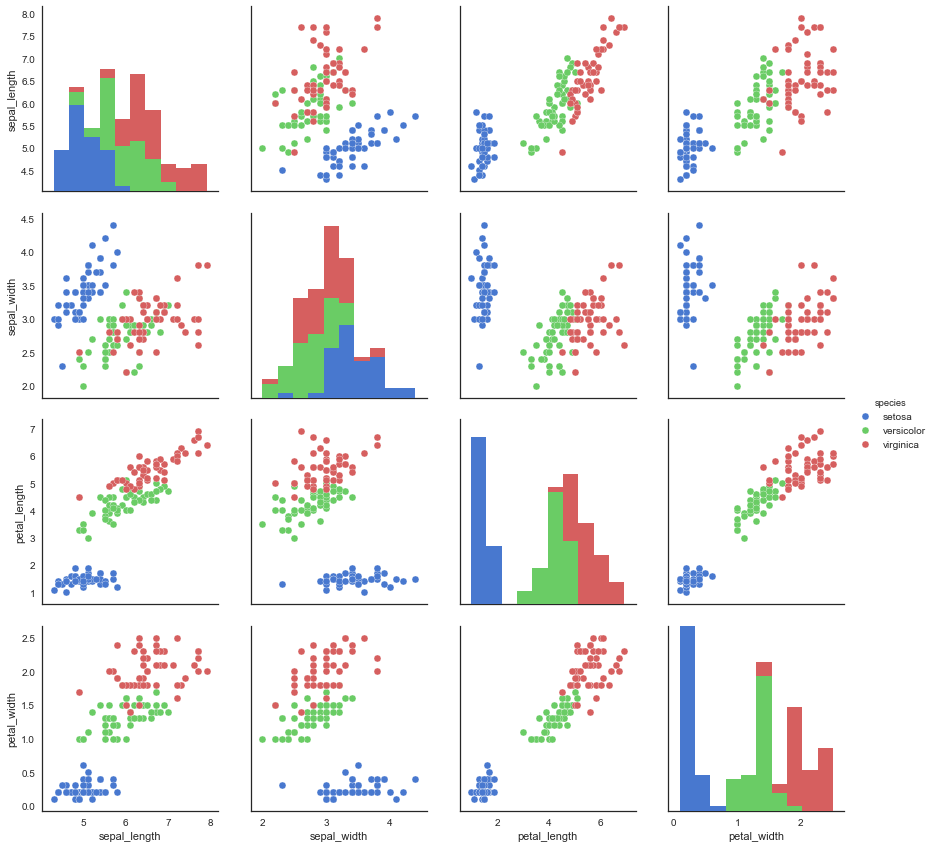

In [266]:
# Q10 - Pairplot with seaborn to examine correlation 
# between each of measurements 
sns.pairplot(data, hue = 'species', size = 3);